# Linear Regression Example

In [1]:
import sys
sys.path.append('../../MachineLearningPackage/')

In [2]:
from load_data import LoadData
from graph_view import GraphView
from linear_regression import LinearRegression
from split_data import SplitData
import numpy as np

In [3]:
dataset = LoadData('../tests/datasets', 'ComponentsAnalysis.txt')

In [4]:
data = dataset.load_txt()

In [5]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
split = SplitData(data)

In [7]:
data_train, data_test, data_val = split.split_train_test_val(0.2, 0.2)

In [8]:
print(data_train.size)
print(data_test.size)
print(data_val.size)

118
38
38


In [9]:
data_train = dataset.convert_numpy_array(data_train)
data_test = dataset.convert_numpy_array(data_test)
data_val = dataset.convert_numpy_array(data_val)

In [10]:
X, y = np.atleast_2d(data_train[:, 0]).T, data_train[:, 1]
Xtest, ytest = np.atleast_2d(data_test[:, 0]).T, data_test[:, 1]
Xval, yval = np.atleast_2d(data_val[:, 0]).T, data_val[:, 1]

In [11]:
dataset_graph = GraphView(X, y)

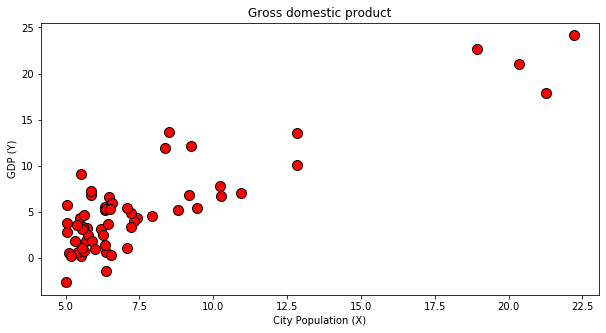

In [12]:
dataset_graph.linear_regression_data('City Population (X)', 'GDP (Y)', 'Gross domestic product')

In [13]:
regressor = LinearRegression(X, y)

In [14]:
optimize_values = regressor.trainLinearReg()

In [15]:
optimize_values.fun

3.456335850642726

In [16]:
optimize_values.x

array([-4.08043478,  1.22963971])

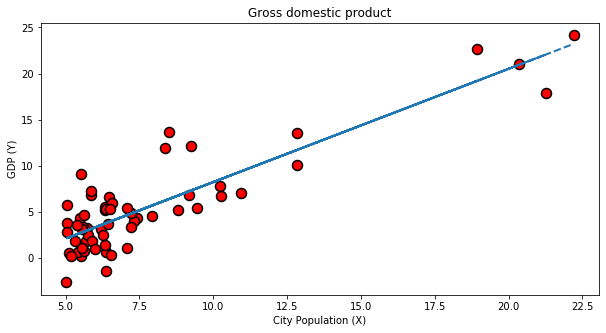

In [17]:
dataset_graph.model_linear('City Population (X)', 'GDP (Y)', 'Gross domestic product')

In [18]:
train_error, val_error = regressor.learningCurve(Xval, yval)

In [19]:
print('# Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

# Training Examples	Training Error		Cross Validation Error
1			3.851859888774472e-34	38.458003750417255
2			1.2096316435554798e-11	1018.9181290386618
3			1.5060786901156868	8.590542768512087
4			2.5558678377394637	8.909886704160067
5			5.426531630311117	10.787879482603541
6			4.932462365805386	10.043470771586243
7			4.6090886562170414	9.460300394433563
8			4.208884379850784	9.148732250453499
9			4.449651996553167	9.654372440933189
10			5.1689972887050475	8.989506223151524
11			4.86169177825104	8.817713243492976
12			5.527596808276496	8.591932801736819
13			5.104860701766327	8.597031089769299
14			4.818048905912154	8.630329877075999
15			4.516299453157162	8.612048982599395
16			4.301518122942937	8.573017426756932
17			4.070240306791413	8.610371672876804
18			3.948892056192251	8.592812084679128
19			3.7701637340326886	8.579046279679712
20			3.5942875564250176	8.581382251705522
21			4.375338842296859	8.658012782013387
22			4.176472985047318	8.658480812671664
23			4.193448971059361	8.58148

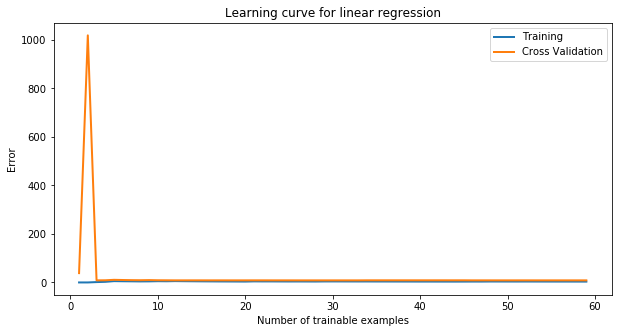

In [20]:
dataset_graph.learning_curve_linear(Xval, yval)

In [21]:
pred = regressor.predict(Xtest)

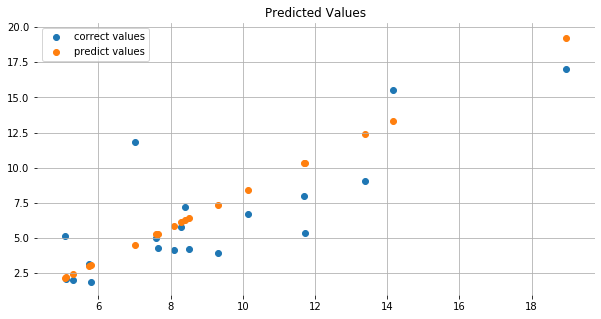

In [22]:
dataset_graph.predicted_values(Xtest, ytest, pred)

In [23]:
J, grad = regressor.normal_equation()

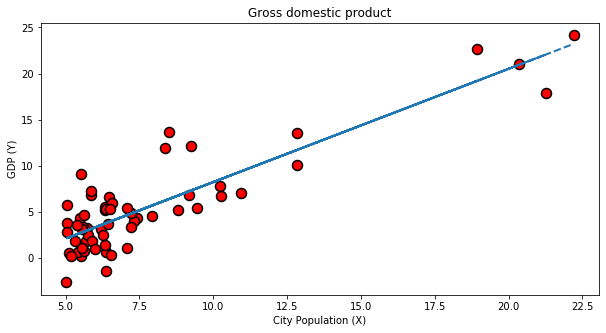

In [24]:
dataset_graph.model_linear_normal_equation('City Population (X)', 'GDP (Y)', 'Gross domestic product')

In [25]:
pred_NE = regressor.predict_normal_equation(Xtest)

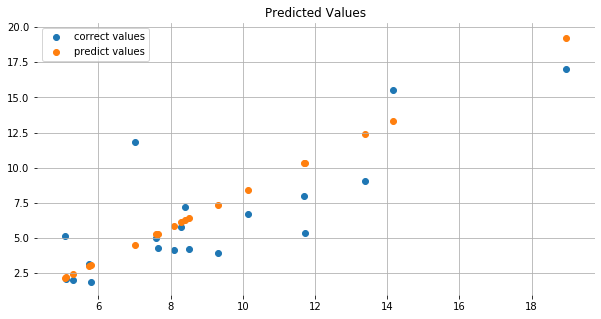

In [26]:
dataset_graph.predicted_values(Xtest, ytest, pred_NE)